In [1]:
%%javascript
IPython.notebook.config.update({
  "load_extensions": {"calico-spell-check":true,
                      "calico-document-tools":true,
                      "calico-cell-tools":true
                     }
})

<IPython.core.display.Javascript object>

In [2]:
%%html
<style>
div.text_cell_render {
    font-size: 19pt;
}
</style>

<center>
    <h1> Geospatial data and analysis with Python </h1>
    <h3> <em> An overview of the NGCM Workshop with Chris Jochem </em> </h3>
    <h4> - Liam Tope </h4>
</center>

# Workshop Introduction

- <b style="color:#3352FF;">Who:</b>
    - Led by Chris Jochem of the WorldPop group 
        in the Geography Department of the University of
        Southampton 
    - Supported by two of his PhD Students: 
        Josie Baulch, and Chris Tomsett

- <b style="color:#3352FF;">When:</b> Took place over two full days on 22/09/2020 and 24/09/2020 

- <b style="color:#3352FF;">Where:</b> (Unsurprisingly) Microsoft Teams 

- <b style="color:#3352FF;">What:</b>
    - Online short lectures 
    - Hands-on practicals via Jupyter Notebooks 
    - Self-study, additional reading/watching material, and further challenges

## Workshop Topics

- <b style="color:#3352FF;"> Day 1:</b>
    - Spatial data formats & Introduction to ```GeoPandas```
    - Georefrencing and projections for global to regional coordinate systems
    - Calculations over reference geometries
    
- <b style="color:#3352FF;"> Day 2:</b>
    - Spatial operations
    - Mapping data and visualisations

## Presentation Overview
- An introduction to some of the course content concepts and 
    implementation is presented 
- <b style="color:#C70039">DISCLAIMER:</b> Includes some source code!

# Geographic Data

Two forms of geogrpahic data:
- <b style="color:#3352FF;"> Vector: </b>
    - Object or entities with shapes
    - Discrete representation (points, lines, or polygons)
    - Can contain multiple, non-spatial attributes
    - *e.g.* Polygon representation of small regions, or point representation of
        landmarks *etc.*
- <b style="color:#3352FF;"> Raster </b>
    - Gridded representation of continuous variable
    - One variable per layer
    - *e.g.* Images (pixels over a discrete grid)

It is more common when preforming spatial analysis and mapping, to consider
*vector* data.

# Vector Data in ```GeoPandas``` 

Here we will load some vector data in a compressed *shapefile* - a common file format in the GIS community

In [34]:
# import packages
import geopandas as gpd

# load example vector data - a set of US states from the US Census Bureau
filepath = '../data/cb_2018_us_state_500k.shp.zip'
gdf = gpd.read_file('zip://' + filepath)
 
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


 The data is loaded into a ```GeoDataFrame```, which is essentially a ```pandas.DataFrame``` with additional
 functionality:

* There is the additional __*geometry*__ column
* There are additional methods available for geographic data operations
* Other ```pandas.DataFrame``` methods and attributes can still be used

# Vector Data In ```GeoPandas``` 

Visualisation of the vector data can be implemented simply, since there is ```matplotlib``` functionality
within ```GeoPandas```


<AxesSubplot:>

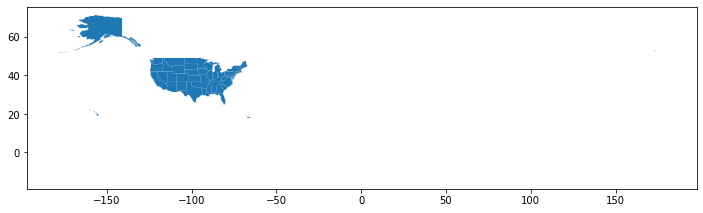

In [55]:
# Plot GeoDataFrame
gdf.plot(figsize=(12,6))

Here, we can see that the vector data is given in terms of geodetic coordinates (latitude, longitude).
Additionally when we plot the data, we see it is given over a two-dimensional *projection* of an otherwise
ellipsoidal surface. The type of projection used heavily influences the accuracy of the subsequent mapping over 
various ranges.

# Projections & Coordinate Reference Systems

> **Map projections** try to portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).
>
> A **coordinate reference system** (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data.
>
>   -- <cite>QGIS Documentation</cite>


<div style="text-align: left">
<img style="float:left;" src="https://docs.qgis.org/3.10/en/_images/projection_families.png" width="500"
                               height="1000"/> 
</div>

* Map projections are never absolutely accurate

* As a result, all maps shows distortions of angular conformity, distance and area

* Many projections compromise the amount of distortions of these properties to some 
  acceptable limit


# Example Projections

We can load some sample data to show the effect of using different projections and coordinate reference systems

In [41]:
# read in a sample dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

'''
Project dataset to different coordinate systems
'''
# EPSG:3410 NSIDC EASE-Grid Global
world_nsidc = world.to_crs(epsg=3410)
# UTM zone centered on Southampton
world_utm = world.to_crs(32630)

# Example Projections

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

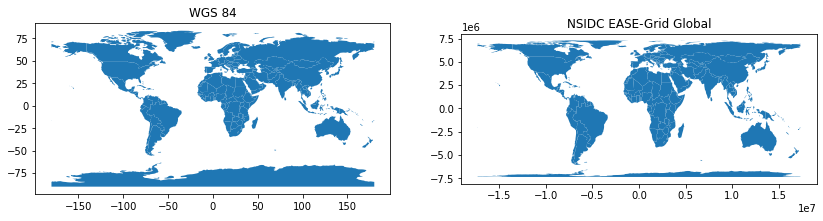

In [57]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
# plot the original data
world.plot(ax=ax1)
ax1.set_title("WGS 84")

# plot the reprojected data
world_nsidc.plot(ax=ax2)
ax2.set_title("NSIDC EASE-Grid Global")

# remove whitespace
plt.tight_layout

* The type of projection you use will affect calculations such as point-to-point distances, or polygon areas.
* When visualising overlapping datasets, it will also be important to ensure they are given in the same CRS

# Spatial Analysis

* In the first day, key concepts of spatial data were introduced
* The next day started to introduce some more realistic spatial analysis concepts
* This included the use of real-world datasets and introducing the workflow of
    <ol>
    <li style="color:#3352FF;"> Loading the data </li>
    <li style="color:#3352FF;"> Combining multiple datasets </li>
    <li style="color:#3352FF;"> Cleaning up the data - <em>i.e.</em> if there is missing data <em>etc.</em> </li>
    <li style="color:#3352FF;"> Producing clear and understandable maps of the data </li>
    </ol>
* From here, we will explore this workflow procedure for the example of supermarket locations in Southampton
* We begin by loading the dataset of census "Output Areas" (OAs) - the smallest unit of population geography for     the census in the UK, as well as the supermarket location data

In [7]:
# load output areas
oa = gpd.read_file('../data/soton_OA_2011.gpkg')
# load supermarket points
smkt_pts = gpd.read_file('../data/supermarket_pts.gpkg')
# load supermarket polygons
smkt_ply = gpd.read_file('../data/supermarket_poly.gpkg')

# Ensure supermarket data is in same crs as OA data
smkt_ply_proj = smkt_ply.to_crs(oa.crs)
smkt_pts_proj = smkt_pts.to_crs(oa.crs)

# Combining Data - Buffering and Clipping

* If we want to consider only supermarkets within the Southampton region then we can *clip* the supermarkets data
    to only those within the *OA* dataset. `GeoPandas` makes this operation very simple. 
* However, for some of the Southampton population, their nearest supermarket may be outside the *OA*-defined 
    region. To account for this, we can *buffer* the combined *OA* polygon with some given distance (in the units 
    of the CRS)

In [8]:
# buffer OA by 1km
oa_buffer = gpd.GeoDataFrame({'id':[1],
                              'geometry': oa.unary_union.buffer(1000)}, # unary_union combines all OA polygons 
                              crs=oa.crs)

# clip Supermarket data to those within OA buffer region
smkt_pts_soton = gpd.clip(smkt_pts_proj, oa_buffer)
smkt_ply_soton = gpd.clip(smkt_ply_proj, oa_buffer)

# combine clipped supermarket points and polygons - use centre of polygons
smkt_ply_soton.geometry = smkt_ply_soton.centroid
# combine supermarket data
smkts = smkt_pts_soton.append(smkt_ply_soton)

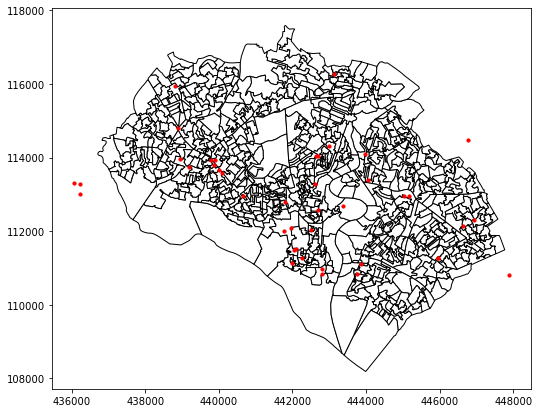

In [52]:
# plot overlapping datasets
fig, ax = plt.subplots(figsize=(15,7))
ax.set_aspect('equal')

# plot the outlines of the output areas
oa.plot(ax=ax, color='white', edgecolor='black')
# add the supermarket points
smkts.plot(ax=ax, marker='o', color='red', markersize=10)

plt.show()

# Data Analysis

* Here we will consider the relatively simple analysis of determining the distance to the nearest supermarket in
  each region of the *OA* dataset. 
  
* This was the second worked example for this dataset

* There numerous possible analyses, which employ different `GeoPandas` functionalities, but hopefully this serves 
    as a useful example

* Although there are several individual addresses in each region, if we wish to calculate the *average* distance,
    then we can use the polygon *centroid*  

In [10]:
# Center of OA regions
oa_pts = oa.centroid

# distance from OA centroids to supermarkets
# use a unary union to combine supermarket locations and find the nearest distance
oa['smkt_dist'] = oa_pts.distance(smkts.unary_union)


# Visualise Data

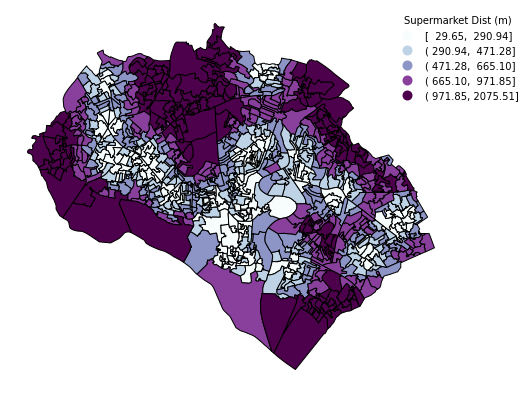

In [23]:
# Visualise results
fig, ax = plt.subplots(1, 1, figsize=(12,7))

oa.plot(ax=ax,
        column='smkt_dist',
        cmap='BuPu', 
        scheme='Quantiles',    # Change from continuous colourbar to Quantiles
        k=5,                   # Number of quantiles
        edgecolor='k',
        legend=True,
        legend_kwds={'title':"Supermarket Dist (m)", 'frameon':False, 
                     'bbox_to_anchor':(0.85, 1), 'loc':'upper left'} 
        )
ax.set_axis_off()

# Visualisation

Other visualisation options are available, such as using *raster* background maps from 
online resources (*OpenStreetMap etc.*)

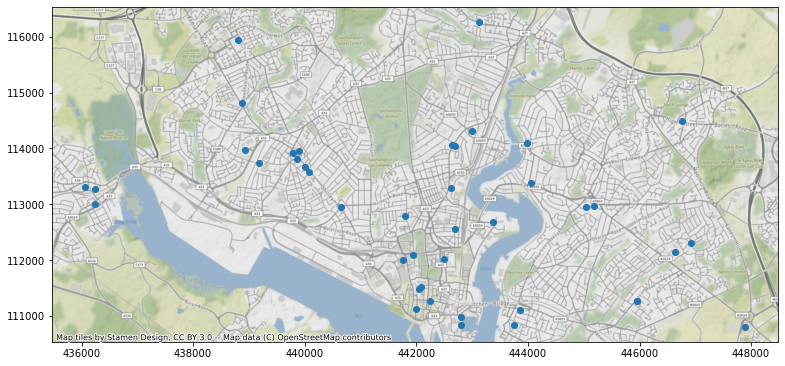

In [18]:
# Load package for online basemaps
import contextily as cx

fig, ax = plt.subplots(figsize=(13,8))
# Plot supermarket locations
smkts.plot(ax=ax)
# add the basemap to the same axis
cx.add_basemap(ax,                              # add to the same plot
               crs=smkts.crs.to_string()        # set the projection
              )

We can also create interactive maps using the `folium` package.

In [22]:
import folium

# create a map
m = folium.Map(width=700,height=400, location=[50.934358, -1.399073], zoom_start=12,
               control_scale=True  # add a scale bar to the map
              )

# convert our DataFrames into GeoJSON format
smkts_gj = folium.features.GeoJson(smkts, name='Supermarkets')
# add the points
smkts_gj.add_to(m)
# Show map
m

And we can cluster nearby points together for a neater map

In [32]:
from folium.plugins import MarkerCluster

# create a map
m = folium.Map(width=700,height=400, location=[50.934358, -1.399073], zoom_start=12,
               control_scale=True  # add a scale bar to the map
              )
# create a set of locations from the supermarket points (in CRS of map)
locs = list(zip(smkts.to_crs(4326).geometry.y, smkts.to_crs(4326).geometry.x))
# create the marker clusters
mc = MarkerCluster(locs)
# add to the map
mc.add_to(m)
# show the map
m

# Visualisation Concepts

* There are may more options for creating maps with `GeoPandas` and interactive
    maps with `folium`

* Since `GeoPandas` contains `matplotlib` functionality within the `GeoDataFrame.plot()` function, customising
    maps is relatively intuitive (experience dependent)

* In general, when creating maps it is important to ensure that they
  
     <ol>
     <li> <span, style="color:#3352FF;"> Convey information accurately </span> </li>
    
     <li> <span, style="color:#3352FF;"> Give context and tell a story </span> </li>
    
     <li> <span, style="color:#3352FF;"> Organise various frameworks </span> </li> 
     </ol>

* Similar to the principles of graphic design, and even for creating useful, informative, and clear figures of scientific data

* Considerations therefore need to be made for certain map features such as
    
     <ol>
    <li> <span style="color:#3352FF;">Colour schemes</span> - are various levels distinctive, and can then different colours
                                 be easily interpreted? </li>
    
    <li> <span style="color:#3352FF;"> Accessibility </span> - can it be interpreted by colour blind readers? </li>
    
    <li> <span style="color:#3352FF;"> Scales of grouped data </span>  - not too coarse or fine compared to the length-scale of the data variation </li>
     </ol>

# Workshop Summary

* The virtual workshop experience was new for all involved

* Nevertheless, logistically both the lecture and practical sessions were well-run

* Information was presented clearly - easy to follow for someone without a
    Geography background

* Practicals allowed for exploring different features of the `GeoPandas` library,
    and a good *hands-on* introduction to geospatial analysis

* An insightful and enjoyable experience!


# Application to my research

### IMS Infrasound Stations

<img align="center" src="./ims.pdf" alt="Infrasound Monitoring Stations">

* Used geocoding functionality of `GeoPandas` to generate a `Point` type for each station from a text description of the location
* Overlapped the resulting data with the `naturalearth_lowres` sample dataset
* Used standard `matplotlib` functions to generate the map

# Application to my research

### Atmospheric Sound Ducting

Sound ducting first investigated around the First World War where noise from explosions/gun-fire was found 
to exhibit zones of audibility and silence:

<img align="center" src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-1-4020-9508-5_1/MediaObjects/978-1-4020-9508-5_1_Fig14_HTML.gif" alt="December 1918 Gutenberg Explosion">

Applied the results from a atmospheric ray propagation model from an impulsive source for a relatively simple 
atmosphere to demonstrate that these sorts of maps can be reproduced without physical observations

